In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

from langdetect import detect
from scipy.stats import f_oneway
from collections import Counter

nltk.download("stopwords", quiet=True)

from nltk.stem.snowball import SpanishStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.linear_model import LogisticRegression

In [24]:
df_data = pd.read_excel(r"datos/Datos_proyecto.xlsx")

In [25]:
print("===Count==")
print(df_data.count())
# Valores nulos por columna
print("==Datos Nulos==")
print(df_data.isnull().sum())

print("==Eliminar filas sin texto o etiqueta==")
df = df_data.dropna(subset=["textos", "labels"])
print(df.count())

print("==verificar si hay textos con strings vacíos==")
num_empty = (df["textos"].str.strip() == "").sum()
print("Número de textos vacíos:", num_empty)

print("==Unicidad==")
duplicados = df.duplicated(subset=["textos"])
print(f"Duplicados encontrados: {duplicados.sum()}")

print("== Eliminar duplicados exactos (mismo texto y misma etiqueta ==")
df = df.drop_duplicates(subset=["textos", "labels"])
df.count()


===Count==
textos    2424
labels    2424
dtype: int64
==Datos Nulos==
textos    0
labels    0
dtype: int64
==Eliminar filas sin texto o etiqueta==
textos    2424
labels    2424
dtype: int64
==verificar si hay textos con strings vacíos==
Número de textos vacíos: 0
==Unicidad==
Duplicados encontrados: 0
== Eliminar duplicados exactos (mismo texto y misma etiqueta ==


textos    2424
labels    2424
dtype: int64

In [26]:
wpt = nltk.WordPunctTokenizer()
stop_words = set(nltk.corpus.stopwords.words("spanish"))

spanish_stemmer = SpanishStemmer()


def tokenize_text(text, stem=True):
    # Elimina caracteres especiales y espacios en blanco
    doc = re.sub(r"[^A-Za-zÁÉÍÓÚáéíóúÜüÑñ\s]", "", text, flags=re.U)  # Unicode aware
    doc = doc.lower()
    doc = doc.strip()
    # Tokenizar documento
    tokens = wpt.tokenize(doc)
    # Filtrar palabras
    filtered_tokens = [
        spanish_stemmer.stem(token) if stem else token
        for token in tokens
        if token not in stop_words
    ]
    # Recrear documento de texto
    doc = " ".join(filtered_tokens)
    return doc, filtered_tokens


normalized_df = df.copy()
normalized_df[["tokenized_text", "tokens"]] = normalized_df["textos"].apply(
    lambda x: pd.Series(tokenize_text(x, stem=False))
)

# recalcular word_count
normalized_df["word_count"] = normalized_df["textos"].apply(
    lambda x: len(str(x).split())
)

In [27]:
# 9. Distribución de etiquetas
print("Distribución de clases:")
dist_df = pd.DataFrame(
    {
        "cantidad": df["labels"].value_counts(),
        "porcentaje": round(df["labels"].value_counts() / len(df), 2),
    }
)
print(dist_df)

Distribución de clases:
        cantidad  porcentaje
labels                      
4           1025        0.42
3            894        0.37
1            505        0.21


In [28]:
X = normalized_df["tokenized_text"]
y = normalized_df["labels"]
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

In [29]:
vectorizer_ngram = CountVectorizer(ngram_range=(1, 1))
X_train = vectorizer_ngram.fit_transform(X_train_text.fillna(""))
X_test = vectorizer_ngram.transform(X_test_text.fillna(""))

best_model_1 = LogisticRegression(max_iter=1000, random_state=42)

best_model_1.fit(X_train, y_train)

y_preds = best_model_1.predict(X_test)

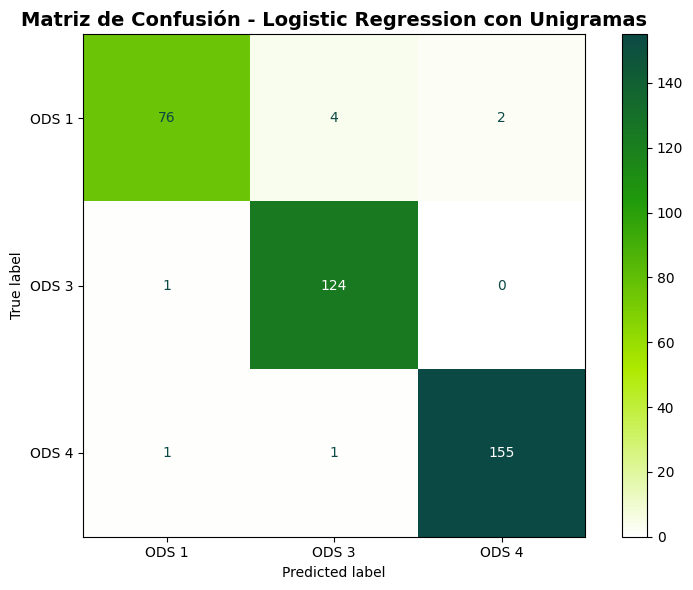

In [30]:

from matplotlib.colors import LinearSegmentedColormap

# Crear colormap personalizado con los colores especificados que se usan en la ppt
colors = ['#FFFFFF', '#AEEA00', '#219A0B', '#0B4944']
custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)

cm = confusion_matrix(y_test, y_preds)

# Visualización 1: Usando ConfusionMatrixDisplay de sklearn
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["ODS 1", "ODS 3", "ODS 4"]
)
disp.plot(cmap=custom_cmap, values_format="d", ax=ax)
plt.title(
    "Matriz de Confusión - Logistic Regression con Unigramas",
    fontsize=14,
    fontweight="bold",
)
plt.tight_layout()
plt.show()

In [31]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.97      0.93      0.95        82
           3       0.96      0.99      0.98       125
           4       0.99      0.99      0.99       157

    accuracy                           0.98       364
   macro avg       0.97      0.97      0.97       364
weighted avg       0.98      0.98      0.98       364



In [32]:
df_data_2 = pd.read_excel(r"datos/Datos_etapa 2.xlsx")

In [33]:
print("===Count==")
print(df_data_2.count())
# Valores nulos por columna
print("==Datos Nulos==")
print(df_data_2.isnull().sum())

print("==Eliminar filas sin texto o etiqueta==")
df2 = df_data_2.dropna(subset=["textos", "labels"])
print(df2.count())

print("==verificar si hay textos con strings vacíos==")
num_empty = (df2["textos"].str.strip() == "").sum()
print("Número de textos vacíos:", num_empty)

print("==Unicidad==")
duplicados = df2.duplicated(subset=["textos"])
print(f"Duplicados encontrados: {duplicados.sum()}")

print("== Eliminar duplicados exactos (mismo texto y misma etiqueta ==")
df2 = df2.drop_duplicates(subset=["textos", "labels"])
df2.count()


===Count==
textos    99
labels    99
dtype: int64
==Datos Nulos==
textos    0
labels    0
dtype: int64
==Eliminar filas sin texto o etiqueta==
textos    99
labels    99
dtype: int64
==verificar si hay textos con strings vacíos==
Número de textos vacíos: 0
==Unicidad==
Duplicados encontrados: 0
== Eliminar duplicados exactos (mismo texto y misma etiqueta ==


textos    99
labels    99
dtype: int64

In [34]:
normalized_df2 = df2.copy()
normalized_df2[["tokenized_text", "tokens"]] = normalized_df2["textos"].apply(
    lambda x: pd.Series(tokenize_text(x, stem=False))
)

# recalcular word_count
normalized_df2["word_count"] = normalized_df2["textos"].apply(
    lambda x: len(str(x).split())
)

In [35]:
# 9. Distribución de etiquetas
print("Distribución de clases:")
dist_df2 = pd.DataFrame(
    {
        "cantidad": df2["labels"].value_counts(),
        "porcentaje": round(df2["labels"].value_counts() / len(df2), 2),
    }
)
print(dist_df2)

Distribución de clases:
        cantidad  porcentaje
labels                      
4             43        0.43
3             35        0.35
1             21        0.21


In [36]:
colors = {1: "#1D8F97", 3: "#9bd137", 4: "#DA2C38"}

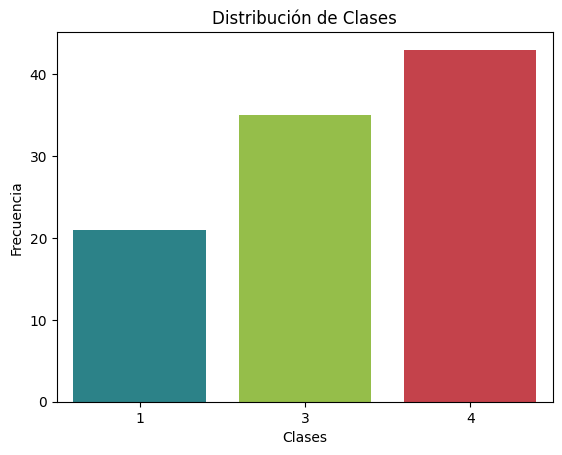

In [37]:
value_counts = df2["labels"].value_counts()
x_values = value_counts.index
y_values = value_counts.values

sns.barplot(x=x_values, y=y_values, palette=colors, hue=x_values, legend=False)

plt.title("Distribución de Clases")
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.show()

In [38]:
X = normalized_df2["tokenized_text"]
y = normalized_df2["labels"]
X_test = X.copy()
y_test = y.copy()
# Ahora sí transformar el test (usar la variable correcta)
X_test = vectorizer_ngram.transform(X_test.fillna(""))

# Predecir con el modelo ya entrenado
y_preds = best_model_1.predict(X_test)

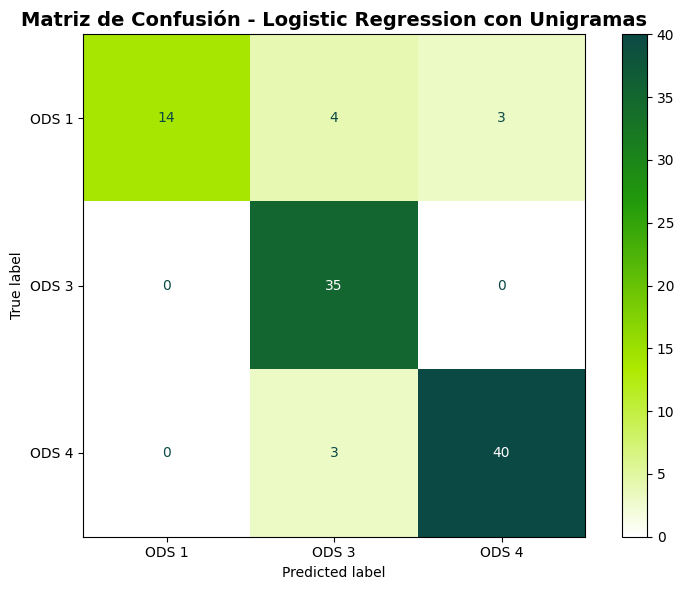

In [39]:

from matplotlib.colors import LinearSegmentedColormap

# Crear colormap personalizado con los colores especificados que se usan en la ppt
colors = ['#FFFFFF', '#AEEA00', '#219A0B', '#0B4944']
custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)
cm = confusion_matrix(y_test, y_preds)

# Visualización 1: Usando ConfusionMatrixDisplay de sklearn
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["ODS 1", "ODS 3", "ODS 4"]
)
disp.plot(cmap=custom_cmap, values_format="d", ax=ax)
plt.title(
    "Matriz de Confusión - Logistic Regression con Unigramas",
    fontsize=14,
    fontweight="bold",
)
plt.tight_layout()
plt.show()

In [40]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80        21
           3       0.83      1.00      0.91        35
           4       0.93      0.93      0.93        43

    accuracy                           0.90        99
   macro avg       0.92      0.87      0.88        99
weighted avg       0.91      0.90      0.90        99



In [41]:
df_concat = pd.concat([normalized_df, normalized_df2])

In [42]:
print("Distribución de clases:")
dist_df = pd.DataFrame(
    {
        "cantidad": df_concat["labels"].value_counts(),
        "porcentaje": round(df_concat["labels"].value_counts() / len(df_concat), 2),
    }
)
print(dist_df)
colors = {1: "#1D8F97", 3: "#9bd137", 4: "#DA2C38"}

Distribución de clases:
        cantidad  porcentaje
labels                      
4           1068        0.42
3            929        0.37
1            526        0.21


In [43]:
X = df_concat["tokenized_text"]
y = df_concat["labels"]
X_train_real, X_temp, y_train_real, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=40
)

X_val_real, X_test_real, y_val_real, y_test_real = train_test_split(
    X_temp, y_temp,
    test_size=(1/3), 
    stratify=y_temp,
    random_state=40
)


# Crear DataFrames para cada conjunto
df_train_real = pd.DataFrame({"textos": X_train_real, "labels": y_train_real})
df_val_real = pd.DataFrame({"textos": X_val_real, "labels": y_val_real})
df_test_real = pd.DataFrame({"textos": X_test_real, "labels": y_test_real})

In [44]:
train_texts = set(df_train_real["textos"])
val_texts = set(df_val_real["textos"])
test_texts = set(df_test_real["textos"])
print("Train/Val overlap:", len(train_texts & val_texts))
print("Train/Test overlap:", len(train_texts & test_texts))
print("Val/Test overlap:", len(val_texts & test_texts))

Train/Val overlap: 0
Train/Test overlap: 0
Val/Test overlap: 0


In [45]:
print("Tamaños -> train:", len(df_train_real), "val:", len(df_val_real), "test:", len(df_test_real))
print("Distribución original en train:\n", df_train_real["labels"].value_counts())

Tamaños -> train: 1766 val: 504 test: 253
Distribución original en train:
 labels
4    755
3    637
1    374
Name: count, dtype: int64


In [46]:
vectorizer_real = CountVectorizer(ngram_range=(1,1))
X_train_vec_real = vectorizer_real.fit_transform(X_train_real.fillna(""))
X_val_vec_real = vectorizer_real.transform(X_val_real.fillna(""))
X_test_vec_real = vectorizer_real.transform(X_test_real.fillna(""))

model_real = LogisticRegression(max_iter=1000, random_state=42)
model_real.fit(X_train_vec_real, y_train_real)

y_val_pred_real = model_real.predict(X_val_vec_real)
print("Modelo sin aumento:")
print(classification_report(y_val_real, y_val_pred_real))


Modelo sin aumento:
              precision    recall  f1-score   support

           1       0.95      0.94      0.95       101
           3       0.96      0.97      0.97       195
           4       0.99      0.99      0.99       208

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [47]:
# Crear DataFrames para cada conjunto
df_train_real.to_excel(r"df_retrain/datos_train.xlsx", index=False)
df_val_real.to_excel(r"df_retrain/datos_val.xlsx", index=False)
df_test_real.to_excel(r"df_retrain/datos_test.xlsx", index=False)